In [ ]:
!pip install pandas numpy seaborn matplotlib plotly sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, mean_squared_error


In [2]:
df = pd.read_excel("/content/Sand Data.xlsx")
df = df.drop(columns=["entry_id","tdsValue_without_temp"])
df.head()

,Temp,tdsValue,Voltage,Quantity,Sand
0,27.0000,442.62726,1.24072,1,0
1,27.0000,454.10141,1.26973,1,0
2,27.0000,441.36313,1.23750,1,0
3,27.0000,442.62726,1.24072,1,0
4,26.9375,440.68250,1.23428,1,0


In [3]:
df.columns
print("Columns:", df.columns)

df.describe()
print("Description: ",df.describe())

df.info()
print("Info", df.info())

df.isnull().sum()
print("Null Values:", df.isnull().sum())

Columns: Index(['Temp', 'tdsValue', 'Voltage', 'Quantity', 'Sand'], dtype='object')
Description:                Temp     tdsValue      Voltage     Quantity         Sand
count  1750.000000  1750.000000  1750.000000  1750.000000  1750.000000
mean     26.849786   472.404491     1.309454     1.514857   254.342857
std       0.958990    37.434204     0.099050     0.499922   160.868843
min      25.562500    13.370180     0.032230     1.000000     0.000000
25%      26.187500   465.702088     1.301950     1.000000   100.000000
50%      26.500000   474.176820     1.321290     2.000000   300.000000
75%      27.187500   487.686800     1.340630     2.000000   400.000000
max      30.000000   608.480220     1.621000     2.000000   500.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp      1750 non-null   float64
 1   tdsValue  1750 non-null   float64
 

Heat Map: 


<Axes: >

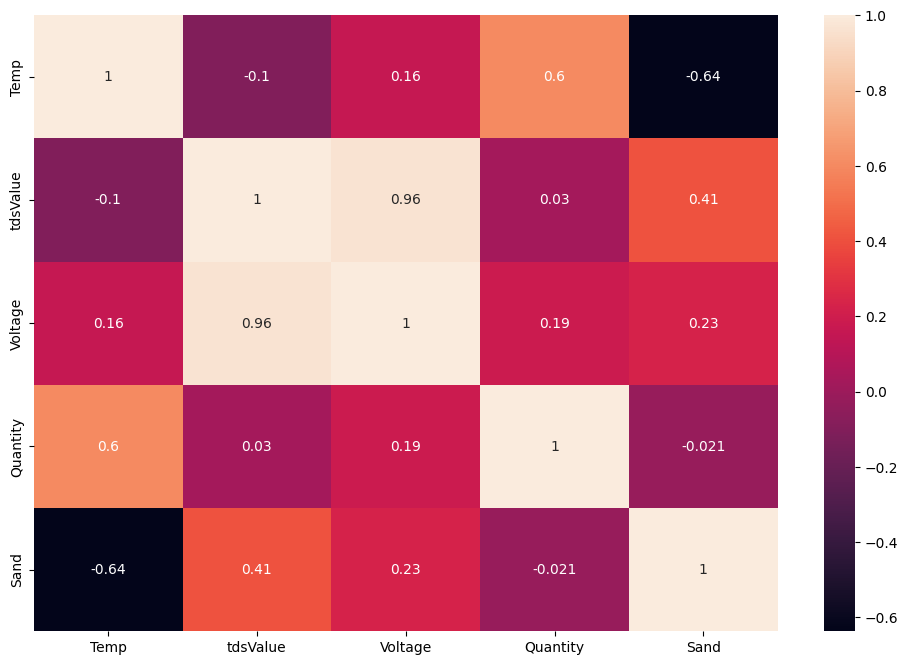

In [4]:
print("Heat Map: ")
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='tdsValue', ylabel='count'>

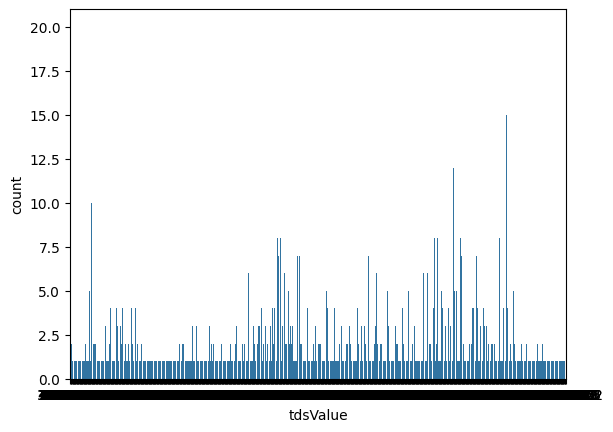

In [5]:
sns.countplot(x="tdsValue", data=df)

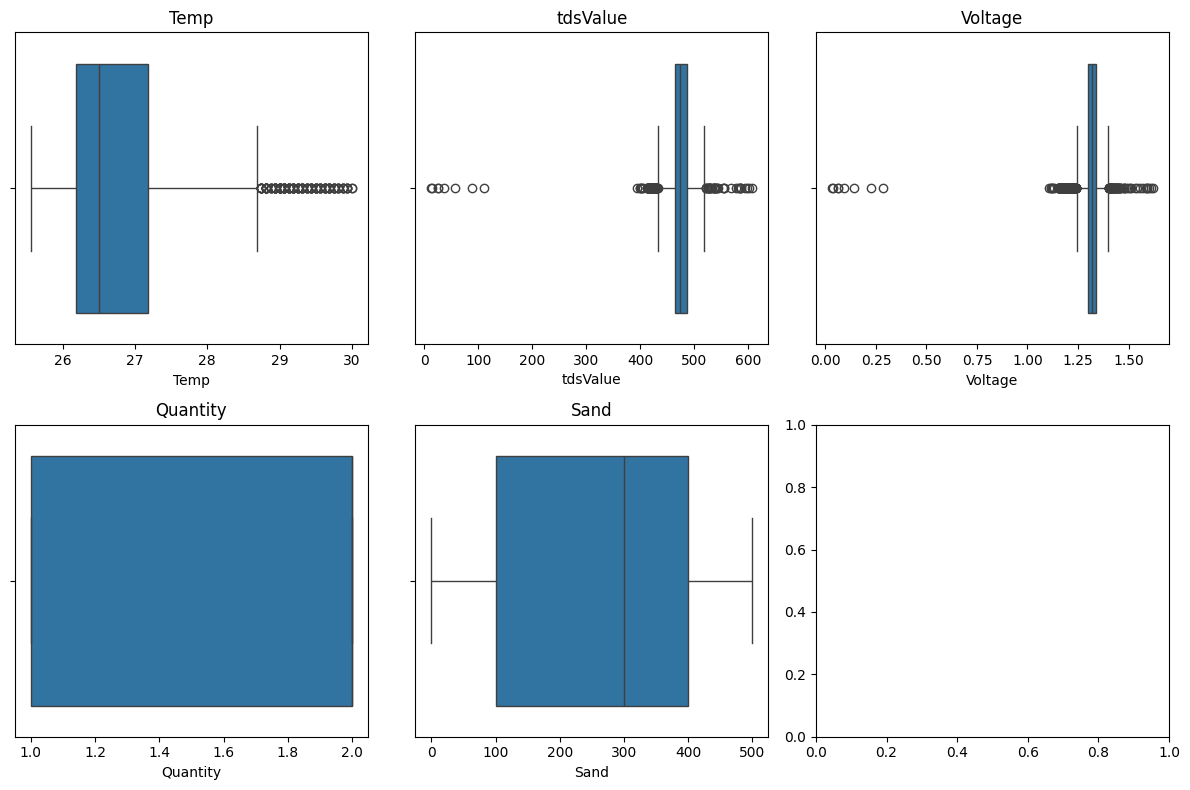

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(df.columns):
    sns.boxplot(x=col, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()


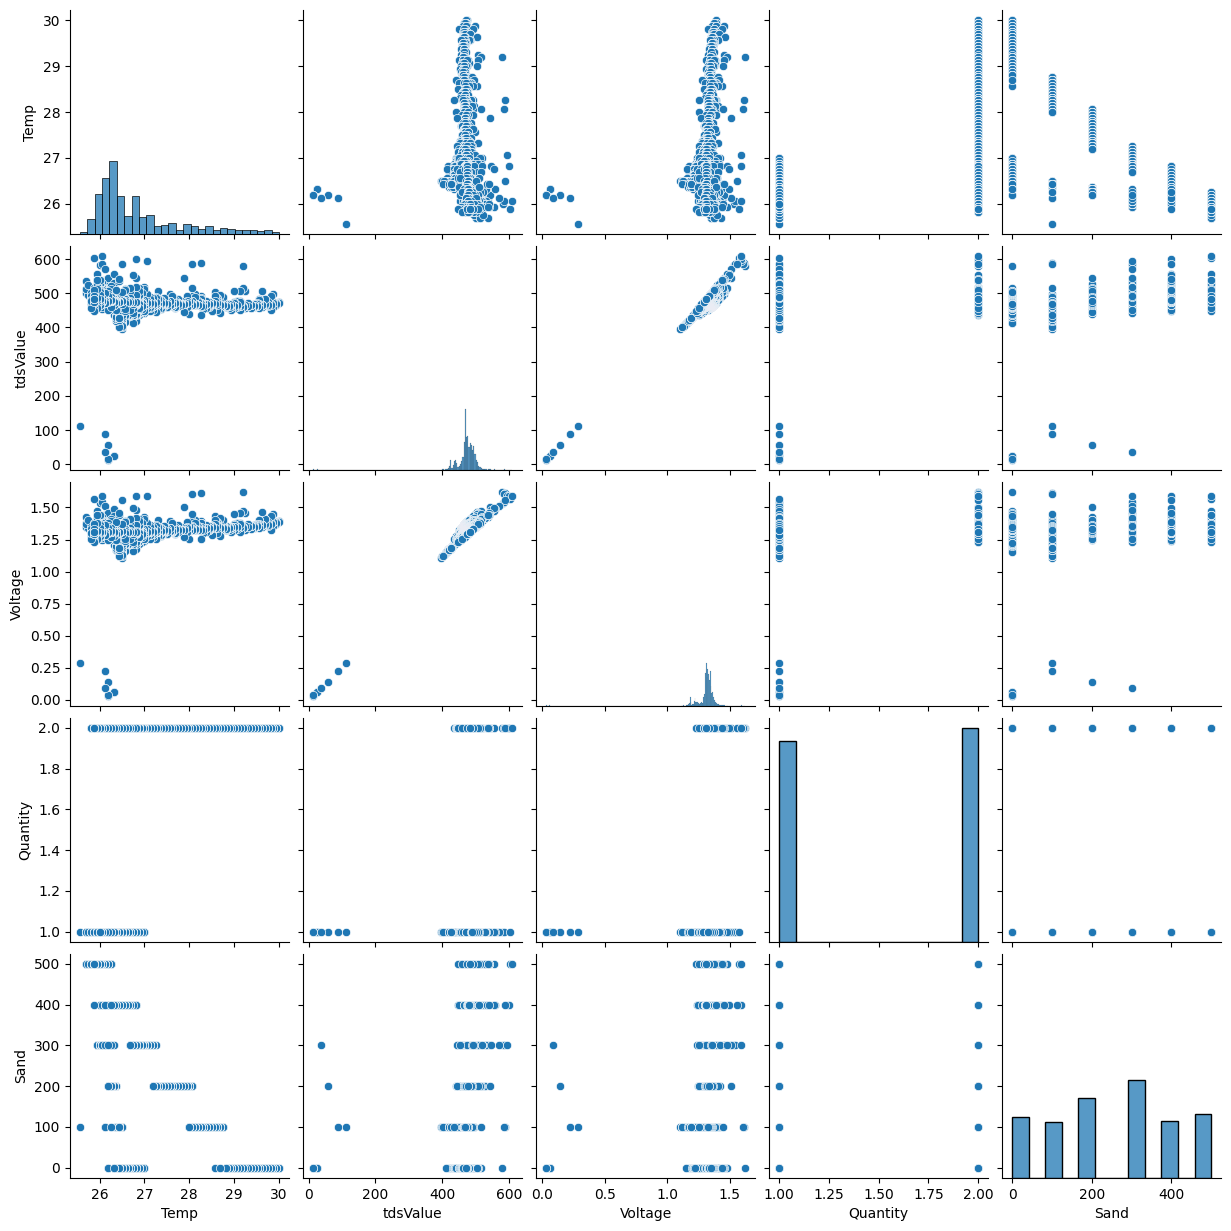

In [7]:
sns.pairplot(df)

In [8]:
x = df.drop("tdsValue", axis=1)
y = df["tdsValue"]

In [9]:
x.shape, y.shape

((1750, 4), (1750,))

In [10]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.15668276, -0.69412807, -1.03016917, -1.58150922],
       [ 0.15668276, -0.40116252, -1.03016917, -1.58150922],
       [ 0.15668276, -0.72664613, -1.03016917, -1.58150922],
       ...,
       [-1.0167616 , -0.1733341 ,  0.97071435,  1.52750126],
       [-1.0167616 ,  0.02187528,  0.97071435,  1.52750126],
       [-1.0167616 ,  0.02187528,  0.97071435,  1.52750126]])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train.shape, x_test.shape

((1400, 4), (350, 4))

In [13]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

## **Logistic Regression**

In [ ]:
#Logistic Regression
#Take Value of Sand to test this
x = df.drop("Sand", axis=1)
y = df["Sand"]
#object creation
model_log_r= LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model_log_r.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Making Prediction
pred_log_r = model_log_r.predict(x_test)

In [ ]:
#accuracy score
accuracy_score_log = accuracy_score(y_test,pred_log_r)
accuracy_score_log

0.4742857142857143

In [ ]:
#Decision Tree

## **Decision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth = 8)

In [ ]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
pred_dt = model_dt.predict(x_test)

In [ ]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt

0.8542857142857143

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
cm2
# sns.heatmap(cm2/np.sum(cm2))

array([[44,  2,  0,  0,  0,  0],
       [ 1, 45,  2,  1,  0,  0],
       [ 0,  1, 59,  2, 16,  0],
       [ 0,  0,  1, 66,  5,  1],
       [ 0,  0,  6,  5, 37,  2],
       [ 0,  0,  0,  3,  3, 48]])

## **Linear Regression**

In [18]:
model_lin_r = LinearRegression()
model_lin_r.fit(x_train, y_train)
y_pred_lr = model_lin_r.predict(x_test)
# print(pred_lin_r)

mse_lr = mean_squared_error(y_test,y_pred_lr)
intercept = model_lin_r.intercept_
coefficients = model_lin_r.coef_
print("Linear Regression Equation:")
# print(f"y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...")
print(len(coefficients))




Linear Regression Equation:
4


## **Polynomial Regression**

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming x_train, x_test, y_train, y_test are already defined

degree = 3
poly_features = PolynomialFeatures(degree=degree)

x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)

poly_regressor = LinearRegression()
poly_regressor.fit(x_poly_train, y_train)
y_pred_pr = poly_regressor.predict(x_poly_test)

mse_pr = mean_squared_error(y_test, y_pred_pr)
print("Mean Squared Error:", mse_pr)

intercept = poly_regressor.intercept_
coefficients = poly_regressor.coef_
print("Linear Regression Equation:")
# print(f"y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...")
print(coefficients)





Mean Squared Error: 0.0013011462864471694
Linear Regression Equation:
[-6.77859881e-14 -4.99897534e+00  2.02988845e+01  1.17917596e-02
  6.39222042e-04  2.04371484e-01 -1.39265409e+00 -2.29897842e-01
  1.34150403e-04  1.13527996e+00  1.25489916e+00  9.03945856e-03
 -7.01076997e-04 -8.75843067e-03 -1.92233687e-03 -2.61604920e-02
  1.00374434e-01  6.70573733e-02 -5.34891546e-02 -7.64585179e-02
  1.86744892e-02  9.31501258e-02 -4.98530681e+00  2.78461013e-02
 -4.67929666e-02  5.99723393e-02 -5.76725107e-03 -5.51394296e-03
  2.02242747e+01 -2.41799621e-02  2.65768704e-02  1.18334420e-02
  1.15995300e-03  1.77552081e-02 -1.33486460e-02]


## **Random Forest Regressor**

Mean Squared Error: 7.590145093194568


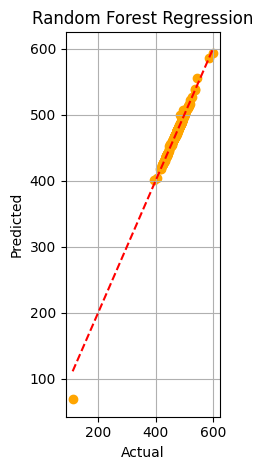

In [55]:
from sklearn.ensemble import RandomForestRegressor

#TESTED TILL 30
rf_regressor = RandomForestRegressor(random_state=42, max_depth = 24)
rf_regressor.fit(x_train, y_train)
y_pred_rf = rf_regressor.predict(x_test)

mse_rfr = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rfr)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

## **Decision Tree Regression**

Mean Squared Error: 7.478578818636682


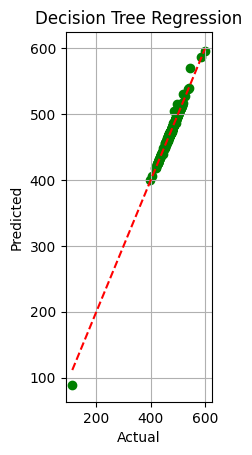

In [58]:
from sklearn.tree import DecisionTreeRegressor

#TESTED TILL 30
dt_regressor = DecisionTreeRegressor(random_state=99, max_depth = 16)
dt_regressor.fit(x_train, y_train)
y_pred_dt = dt_regressor.predict(x_test)
mse_dtr = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse_dtr)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')
plt.grid(True)

## **KNeighborsRegressor**

Mean Squared Error: 7.137199915001144


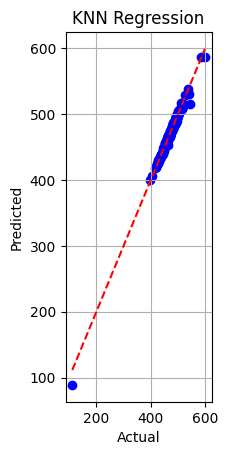

In [43]:
from sklearn.neighbors import KNeighborsRegressor
k = 1
#TESTED TILL 15
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(x_train, y_train)
y_pred_knn = knn_regressor.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse_knn)

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression')
plt.grid(True)

## **TEST RESULTS**

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tabulate import tabulate

# Calculate MSE for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_pr = mean_squared_error(y_test, y_pred_pr)

# Calculate RMSE for each model
rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_dt = np.sqrt(mse_dt)
rmse_knn = np.sqrt(mse_knn)
rmse_pr = np.sqrt(mse_pr)

# Calculate R2 score for each model
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_knn = r2_score(y_test, y_pred_knn)
r2_pr = r2_score(y_test, y_pred_pr)

data = [
    ["Linear Regression", mse_lr, rmse_lr, r2_lr],
    ["Random Forest Regression", mse_rf, rmse_rf, r2_rf],
    ["Decision Tree Regression", mse_dt, rmse_dt, r2_dt],
    ["KNN Regression", mse_knn, rmse_knn, r2_knn],
    ["Polynomial Regression", mse_pr, rmse_pr, r2_pr]
]

# Define table headers
headers = ["Regression Model", "MSE", "RMSE", "R-squared"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="pretty"))



+--------------------------+-----------------------+----------------------+--------------------+
|     Regression Model     |          MSE          |         RMSE         |     R-squared      |
+--------------------------+-----------------------+----------------------+--------------------+
|    Linear Regression     |   4.594144385857376   |  2.1433955271618386  | 0.9950437534511518 |
| Random Forest Regression |   7.780791205361567   |  2.7894069630230662  | 0.9916059408847498 |
| Decision Tree Regression |   6.729682180888277   |  2.594163098359137   | 0.9927398964241199 |
|      KNN Regression      |   7.137199915001144   |  2.6715538390609206  | 0.9923002588782237 |
|  Polynomial Regression   | 0.0013011462864471694 | 0.036071405384974525 | 0.9999985962997132 |
+--------------------------+-----------------------+----------------------+--------------------+
